In [4]:
import gator
import matplotlib
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC
from veloxchem import OutputStream
import sys
import warnings
warnings.filterwarnings('ignore')

In [5]:
thiophene = gator.get_molecule("""
S             -0.000000    1.192685    0.000000
C             -0.711444   -1.266809    0.000000
C              0.711447   -1.266803   -0.000000
C             -1.238145   -0.009743    0.000000
C              1.238143   -0.009741   -0.000000
H             -1.314338   -2.162700    0.000000
H              1.314340   -2.162697   -0.000000
H             -2.274762    0.280500    0.000000
H              2.274758    0.280506   -0.000000
""")

u = mda.Universe('thiophene.xyz')

molec = u.select_atoms('all')

view = nv.show_mdanalysis(molec)
view


NGLWidget()

In [6]:
basis = gator.get_molecular_basis(thiophene, '6-31G')

In [ ]:
scf = gator.run_scf(thiophene, basis, conv_thresh=1e-8, verbose=False)

In [5]:
scf.mol_orbs.print_orbitals(thiophene, basis, all_orbs=True, ostream=OutputStream(sys.stdout))

                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                                                                 
               --------------------------                                                                                 
               Occupation: 2.0 Energy:  -91.96991 au                                                                      
               (   1 S   1s  :    -1.00)                                                                                  
                

In [6]:
cvs_adc = gator.run_adc(thiophene, basis, scf, verbose=True, method='cvs-adc1', core_orbitals='2-5', states=22)

                                                                                                                          
                                        Algebraic Diagrammatic Construction (ADC)                                         
                                                                                                                          
                               ADC method                   : cvs-adc1                                                    
                               Number of States             : 22                                                          
                               CVS-ADC, Core Orbital Space  : 2 3 4 5                                                     
                               Convergence threshold        : 1.0e-06                                                     
                                                                                                                          
Starting cvs-adc

In [78]:
cvs_C1 = gator.run_adc(thiophene, basis, scf, method='cvs-adc1', core_orbitals='2-3', states=11)

Starting cvs-adc1  Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1    22       0.06143  160ms  [10.96946748 10.96949552 11.10122524 11.10125428 11.16552795 11.16558411
 11.25923049]
  2    44      0.076246  287ms  [10.86048711 10.86056333 10.9657211  10.96582169 11.09233403 11.09244049
 11.21141137]
  3    66      0.047339  463ms  [10.85356057 10.85358422 10.94649972 10.94652151 11.02384755 11.02411111
 11.07353597]
  4    88     0.0027514  626ms  [10.83679257 10.83680068 10.88838692 10.88860956 10.93280359 10.93281355
 10.99998854]
  5   110    5.8521e-06  823ms  [10.83658597 10.83659242 10.88789889 10.888122   10.93224637 10.93224848
 10.99909128]
=== Restart ===
  6    38    2.5526e-08  546ms  [10.83658597 10.83659242 10.88789889 10.888122   10.93224539 10.9322475
 10.99908959]
=== Converged ===
    Number of matrix applies:    126
    Total solver time:             2s 928ms


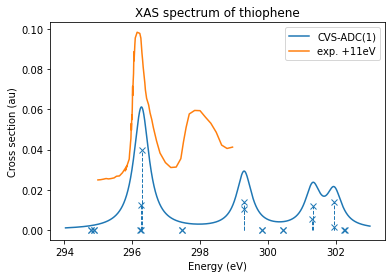

In [7]:
cvs_adc.plot_spectrum(label='CVS-ADC(1)')
#cvs_C1.plot_spectrum(label='MO2, MO3')

#import the experimental data from file:
import numpy 
xy = numpy.loadtxt('C1s_XAS.dat')
xy[:,1] *= 0.65 #scale intensity
xy[:,0] += 11.0 #shift by 1.25 eV
xy[:,1] += 0.025
matplotlib.pyplot.plot(xy[:,0], xy[:,1], label='exp. +11eV')
matplotlib.pyplot.legend()
matplotlib.pyplot.title("XAS spectrum of thiophene")
#matplotlib.pyplot.savefig("thiophene_adc1_vs_exp.png")
matplotlib.pyplot.show()

In [10]:
print(cvs_adc.describe_amplitudes(tolerance=0.1))

+-------------------------------------+
| State   0 ,      10.83313 au        |
+-------------------------------------+
| HOCO    -> LUMO +2  b->b     -0.486 |
| HOCO    -> LUMO +2  a->a     +0.486 |
| HOCO -1 -> LUMO     b->b     -0.386 |
| HOCO -1 -> LUMO     a->a     +0.386 |
| HOCO    -> LUMO+22  b->b     +0.217 |
| HOCO    -> LUMO+22  a->a     -0.217 |
| HOCO -1 -> LUMO+16  b->b     -0.179 |
| HOCO -1 -> LUMO+16  a->a     +0.179 |
| HOCO -1 -> LUMO+21  b->b     -0.136 |
| HOCO -1 -> LUMO+21  a->a     +0.136 |

+-------------------------------------+
| State   1 ,       10.8333 au        |
+-------------------------------------+
| HOCO -1 -> LUMO +2  a->a     -0.484 |
| HOCO -1 -> LUMO +2  b->b     +0.484 |
| HOCO    -> LUMO     a->a     -0.387 |
| HOCO    -> LUMO     b->b     +0.387 |
| HOCO -1 -> LUMO+22  a->a     +0.216 |
| HOCO -1 -> LUMO+22  b->b     -0.216 |
| HOCO    -> LUMO+16  a->a     -0.178 |
| HOCO    -> LUMO+16  b->b     +0.178 |
| HOCO    -> LUMO+21  b->b     +0.136 |

In [101]:
scf.mol_orbs.print_orbitals(thiophene, basis, all_orbs=True, ostream=OutputStream(sys.stdout))

                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
               Molecular Orbital No.   1:                                                                                 
               --------------------------                                                                                 
               Occupation: 2.0 Energy:  -91.96991 au                                                                      
               (   1 S   1s  :    -1.00)                                                                                  
                